# Obtener Datos a través de APIs

![api](https://www.meme-arsenal.com/memes/6200d14d795eab11d26a3afabed68439.jpg)

## Que quedamos que eran...?

Application Programming Interface

Una serie de Reglas y maneras de comunicarnos con Aplicaciones o Sistemas  de Sw para Obtener información o construir Sw


## Aguantame tantito, antes tenemos que ver que sonn los json


### Son el estandar de como transferir los datos a través de las APIs

![json](https://i.pinimg.com/736x/7c/2a/8d/7c2a8d5b749ca8a9f313ca0e15c844a4.jpg)

In [ ]:
import json
import pandas as pd

In [ ]:
# Hacemos una petición para obtener el archivo JSON
!wget https://raw.githubusercontent.com/devfmx/master-data-ai/main/Kata%20Data%20Wrangling/APIsCollect/data-text.json

--2021-12-08 01:38:33--  https://raw.githubusercontent.com/devfmx/master-data-ai/main/Kata%20Data%20Wrangling/APIsCollect/data-text.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1580512 (1.5M) [text/plain]
Saving to: ‘data-text.json’

data-text.json      100%[===================>]   1.51M  --.-KB/s    in 0.06s   

2021-12-08 01:38:34 (26.8 MB/s) - ‘data-text.json’ saved [1580512/1580512]



In [ ]:
# Leemos nuestro archivo JSON
json_data = open('data-text.json').read()

In [ ]:
json_data

'[\n  {\n    "Indicator":"Life expectancy at birth (years)",\n    "PUBLISH STATES":"Published",\n    "Year":1990,\n    "WHO region":"Europe",\n    "World Bank income group":"High-income",\n    "Country":"Andorra",\n    "Sex":"Both sexes",\n    "Display Value":77,\n    "Numeric":77.00000,\n    "Low":"",\n    "High":"",\n    "Comments":""\n  },\n  {\n    "Indicator":"Life expectancy at birth (years)",\n    "PUBLISH STATES":"Published",\n    "Year":2000,\n    "WHO region":"Europe",\n    "World Bank income group":"High-income",\n    "Country":"Andorra",\n    "Sex":"Both sexes",\n    "Display Value":80,\n    "Numeric":80.00000,\n    "Low":"",\n    "High":"",\n    "Comments":""\n  },\n  {\n    "Indicator":"Life expectancy at age 60 (years)",\n    "PUBLISH STATES":"Published",\n    "Year":2012,\n    "WHO region":"Europe",\n    "World Bank income group":"High-income",\n    "Country":"Andorra",\n    "Sex":"Female",\n    "Display Value":28,\n    "Numeric":28.00000,\n    "Low":"",\n    "High":"",

![json](https://pbs.twimg.com/media/ERqHayrXsAAhs9y.jpg)

In [ ]:
data = json.loads(json_data)
data

In [ ]:
midf=pd.DataFrame(data)
midf

,Indicator,PUBLISH STATES,Year,WHO region,World Bank income group,Country,Sex,Display Value,Numeric,Low,High,Comments
0,Life expectancy at birth (years),Published,1990,Europe,High-income,Andorra,Both sexes,77,77.0,,,
1,Life expectancy at birth (years),Published,2000,Europe,High-income,Andorra,Both sexes,80,80.0,,,
2,Life expectancy at age 60 (years),Published,2012,Europe,High-income,Andorra,Female,28,28.0,,,
3,Life expectancy at age 60 (years),Published,2000,Europe,High-income,Andorra,Both sexes,23,23.0,,,
4,Life expectancy at birth (years),Published,2012,Eastern Mediterranean,High-income,United Arab Emirates,Female,78,78.0,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
4651,Healthy life expectancy (HALE) at birth (years),Published,2012,Western Pacific,Lower-middle-income,Samoa,Female,66,66.0,,,
4652,Healthy life expectancy (HALE) at birth (years),Published,2012,Eastern Mediterranean,Low-income,Yemen,Both sexes,54,54.0,,,
4653,Healthy life expectancy (HALE) at birth (years),Published,2000,Africa,Upper-middle-income,South Africa,Male,49,49.0,,,
4654,Healthy life expectancy (HALE) at birth (years),Published,2000,Africa,Low-income,Zambia,Both sexes,36,36.0,,,


In [ ]:
# !pip install requests
import requests

### Ejercicio de Sw 👇🏼

### Más APIs


![more_apis](https://miro.medium.com/max/860/1*bopgnrkjyiu6usW4xecmqw.jpeg)


## API de CoinGecko Para ver status de Cryptos



In [ ]:
coing_url = 'https://api.coingecko.com/api/v3/coins/'

#coins = requests.get(coing_url, params=params)
coins = requests.get(coing_url)
coins

<Response [200]>

In [ ]:
pd.json_normalize(coins.json()).head()

,id,symbol,name,block_time_in_minutes,last_updated,image.thumb,image.small,image.large,market_data.current_price.aed,market_data.current_price.ars,market_data.current_price.aud,market_data.current_price.bch,market_data.current_price.bdt,market_data.current_price.bhd,market_data.current_price.bmd,market_data.current_price.bnb,market_data.current_price.brl,market_data.current_price.btc,market_data.current_price.cad,market_data.current_price.chf,market_data.current_price.clp,market_data.current_price.cny,market_data.current_price.czk,market_data.current_price.dkk,market_data.current_price.dot,market_data.current_price.eos,market_data.current_price.eth,market_data.current_price.eur,market_data.current_price.gbp,market_data.current_price.hkd,market_data.current_price.huf,market_data.current_price.idr,market_data.current_price.ils,market_data.current_price.inr,market_data.current_price.jpy,market_data.current_price.krw,market_data.current_price.kwd,market_data.current_price.lkr,market_data.current_price.ltc,market_data.current_price.mmk,...,market_data.market_cap_change_percentage_24h_in_currency.uah,market_data.market_cap_change_percentage_24h_in_currency.usd,market_data.market_cap_change_percentage_24h_in_currency.vef,market_data.market_cap_change_percentage_24h_in_currency.vnd,market_data.market_cap_change_percentage_24h_in_currency.xag,market_data.market_cap_change_percentage_24h_in_currency.xau,market_data.market_cap_change_percentage_24h_in_currency.xdr,market_data.market_cap_change_percentage_24h_in_currency.xlm,market_data.market_cap_change_percentage_24h_in_currency.xrp,market_data.market_cap_change_percentage_24h_in_currency.yfi,market_data.market_cap_change_percentage_24h_in_currency.zar,market_data.market_cap_change_percentage_24h_in_currency.bits,market_data.market_cap_change_percentage_24h_in_currency.link,market_data.market_cap_change_percentage_24h_in_currency.sats,market_data.total_supply,market_data.circulating_supply,localization.en,localization.de,localization.es,localization.fr,localization.it,localization.pl,localization.ro,localization.hu,localization.nl,localization.pt,localization.sv,localization.vi,localization.tr,localization.ru,localization.ja,localization.zh,localization.zh-tw,localization.ko,localization.ar,localization.th,localization.id,market_data.roi.times,market_data.roi.currency,market_data.roi.percentage
0,bitcoin,btc,Bitcoin,10.0,2021-12-07T22:03:05.662Z,https://assets.coingecko.com/coins/images/1/th...,https://assets.coingecko.com/coins/images/1/sm...,https://assets.coingecko.com/coins/images/1/la...,185883.00,5132533.00,71081.00,106.703000,4341603.00,19077.320000,50608.000000,87.599000,284112.00,1.000000,63964.00,46815.000000,42503361.00,322217.00,1143359.00,333962.00,1685.000000,15741.00000,11.771937,44912.000000,38214.000000,394667.00,16504091.00,7.267487e+08,158413.00,3816520.00,5747590.0,59563996.00,15327.470000,10262426.00,314.015000,90096831.00,...,0.71561,0.84242,0.84242,1.06136,0.36942,0.52318,0.89147,-0.57680,1.37478,5.82436,0.31750,-0.83799,-5.46538,-0.83799,21000000.0,18894418.0,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,Bitcoin,биткоин,ビットコイン,比特币,比特幣,비트코인,بيتكوين,บิตคอยน์,Bitcoin,NaN,NaN,NaN
1,ethereum,eth,Ethereum,0.2,2021-12-07T22:01:45.579Z,https://assets.coingecko.com/coins/images/279/...,https://assets.coingecko.com/coins/images/279/...,https://assets.coingecko.com/coins/images/279/...,15787.88,435929.00,6037.24,9.064156,368752.00,1620.320000,4298.370000,7.441316,24131.00,0.085028,5432.77,3976.190000,3609999.00,27367.00,97111.00,28365.00,142.980000,1337.00000,1.000000,3814.580000,3245.660000,33521.00,1401766.00,6.172600e+07,13454.74,324154.00,488168.0,5059035.00,1301.830000,871633.00,26.672391,7652325.00,...,-1.19370,-1.06929,-1.06929,-0.85450,-1.53332,-1.38248,-1.02117,-2.46052,-0.55539,3.80947,-1.58426,-2.72603,-7.27744,-2.72603,None,118646734.124,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethereum,Ethe

## Query Parameters! 🙊

In [ ]:
# Estación Espacial Internacional

parameters = {
    "lat": 40.71,
    "lon": -74,
    "n": 9
}
response = requests.get("http://api.open-notify.org/iss-pass.json", params = parameters)
pd.json_normalize(response.json()['response'])

,duration,risetime
0,249,1638970626
1,635,1638976190
2,638,1638981998
3,570,1638987888
4,589,1638993751
5,654,1638999561
6,585,1639005388
7,600,1639059772
8,651,1639065542


# API de YELP para buscar Info de negocios

In [ ]:
yelp_api_url = "https://api.yelp.com/v3/businesses/search"
params = {
    "term": "bookstore",
    "location": "San Francisco"
}

token_yelp = '0bqgbFCfWbtGN0Vq21O5XqkBOd0ipbNA7-jLUqex43fxx7KwPjTK_ZzV0xavWrYUAeLV0kfwR210cp7C_ULIK8MXOheH5sr99KYO3CVZ5ugABqrJS42hbzDxp7yvYXYx'

headers = {"Authorization": "Bearer {}".format(token_yelp)}

response = requests.get(yelp_api_url, 
                        headers=headers, 
                        params=params)

response.json()


## Ejemplo Explorar ThinkSpeak

In [ ]:
api_key_yelp = '3FDPQJAUC5YDPKTV'
yelp_api_url = f"https://api.thingspeak.com/channels/1297504/fields/1.json?api_key={api_key_yelp}&results=100"

response = requests.get(yelp_api_url, 
                        api_key_yelp)

response

<Response [200]>

In [ ]:
data = response.json()
data['channel']

{'created_at': '2021-02-04T01:35:13Z',
 'description': 'Mediciones del agua para jitomate. 20200206 16:46',
 'field1': 'Temperatura Inv',
 'field2': 'Humedad Inv',
 'field3': 'Luminosidad Inv',
 'field4': 'EC mS',
 'field5': 'PPM',
 'field6': 'PH',
 'field7': 'Temperatura Agua',
 'field8': 'Voltaje Promedio 160',
 'id': 1297504,
 'last_entry_id': 1619,
 'latitude': '0.0',
 'longitude': '0.0',
 'name': 'MEGA_ESP_Integrado',
 'updated_at': '2021-05-13T00:26:43Z'}

## Buscamos otro negocio en otro Lugar

In [ ]:
YELP_API_KEY = api_key_yelp
%store YELP_API_KEY

Stored 'YELP_API_KEY' (str)


In [ ]:
params = {
    "term": "pizza",
    "location": "Mexico City"
}
yelp_api_url = "https://api.yelp.com/v3/businesses/search"
api_key_yelp

'3FDPQJAUC5YDPKTV'

In [ ]:
#print(YELP_API_KEY)
headers = {"Authorization": "Bearer {}".format(token_yelp)}
response = requests.get(yelp_api_url, 
                        headers=headers, 
                        params=params)

response.json()

In [ ]:
print(response.json())

{'channel': {'id': 1297504, 'name': 'MEGA_ESP_Integrado', 'description': 'Mediciones del agua para jitomate. 20200206 16:46', 'latitude': '0.0', 'longitude': '0.0', 'field1': 'Temperatura Inv', 'field2': 'Humedad Inv', 'field3': 'Luminosidad Inv', 'field4': 'EC mS', 'field5': 'PPM', 'field6': 'PH', 'field7': 'Temperatura Agua', 'field8': 'Voltaje Promedio 160', 'created_at': '2021-02-04T01:35:13Z', 'updated_at': '2021-05-13T00:26:43Z', 'last_entry_id': 1619}, 'feeds': [{'created_at': '2021-06-28T21:04:22Z', 'entry_id': 1520, 'field1': '19.90', 'latitude': None, 'longitude': None, 'elevation': None}, {'created_at': '2021-06-28T22:14:48Z', 'entry_id': 1521, 'field1': '18.80', 'latitude': None, 'longitude': None, 'elevation': None}, {'created_at': '2021-06-28T23:26:31Z', 'entry_id': 1522, 'field1': '16.60', 'latitude': None, 'longitude': None, 'elevation': None}, {'created_at': '2021-06-29T00:41:43Z', 'entry_id': 1523, 'field1': '15.60', 'latitude': None, 'longitude': None, 'elevation': N

## Buscando por LatLng

In [ ]:
params = {
    "term": "pizza",
    "latitude": "19.410997",
    "longitude": "-99.1439637",
    "radius": 1500
}
yelp_api_url = "https://api.yelp.com/v3/businesses/search"
headers = {"Authorization": "Bearer {}".format(token_yelp)}
response = requests.get(yelp_api_url, 
                        headers=headers, 
                        params=params).json()

response

{'businesses': [{'alias': 'félix-ciudad-de-méxico',
   'categories': [{'alias': 'cocktailbars', 'title': 'Cocktail Bars'},
    {'alias': 'pizza', 'title': 'Pizza'}],
   'coordinates': {'latitude': 19.418312, 'longitude': -99.157614},
   'display_phone': '+52 55 5160 1791',
   'distance': 1646.4792469826318,
   'id': 'hCyj6uj2fruhGxi_gsN2lQ',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/Nnc4vsqCaasea-iexSOAXQ/o.jpg',
   'is_closed': False,
   'location': {'address1': 'Av. Alvaro Obregón 64',
    'address2': 'Col. Roma Nte',
    'address3': '',
    'city': 'Ciudad de México',
    'country': 'MX',
    'display_address': ['Av. Alvaro Obregón 64',
     'Col. Roma Nte',
     '06700 Ciudad de México, CDMX',
     'Mexico'],
    'state': 'DIF',
    'zip_code': '06700'},
   'name': 'Félix',
   'phone': '+525551601791',
   'price': '$$',
   'rating': 4.0,
   'review_count': 20,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/f%C3%A9lix-ciudad-de-m%C3%A9xico?adjust_creative=

In [ ]:
pd.DataFrame(response['businesses'])

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,hCyj6uj2fruhGxi_gsN2lQ,félix-ciudad-de-méxico,Félix,https://s3-media3.fl.yelpcdn.com/bphoto/Nnc4vs...,False,https://www.yelp.com/biz/f%C3%A9lix-ciudad-de-...,20,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.0,"{'latitude': 19.418312, 'longitude': -99.157614}",[],$$,"{'address1': 'Av. Alvaro Obregón 64', 'address...",+525551601791,+52 55 5160 1791,1646.479247
1,4tM2GlM8gBJ8YDV7f19k6w,pizza-franca-méxico,Pizza Franca,https://s3-media2.fl.yelpcdn.com/bphoto/sVtjHo...,False,https://www.yelp.com/biz/pizza-franca-m%C3%A9x...,13,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.0,"{'latitude': 19.4190137, 'longitude': -99.1574...",[],$$,"{'address1': 'Mérida 109', 'address2': 'Local ...",+525552074935,+52 55 5207 4935,1672.637742
2,NizGnZtcrl_ZwtfJaRzr-w,pizza-peppino-méxico,Pizza Peppino,https://s3-media2.fl.yelpcdn.com/bphoto/c7LHyn...,False,https://www.yelp.com/biz/pizza-peppino-m%C3%A9...,10,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.5,"{'latitude': 19.4213488597338, 'longitude': -9...",[],$$,"{'address1': 'Calle Morelia 90', 'address2': N...",+525552088040,+52 55 5208 8040,1668.903864
3,KZuhFaDhcRqyLWCdz9fOWA,central-de-pizzas-méxico-4,Central de Pizzas,https://s3-media1.fl.yelpcdn.com/bphoto/n8nk5q...,False,https://www.yelp.com/biz/central-de-pizzas-m%C...,8,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.0,"{'latitude': 19.4023745, 'longitude': -99.1507...",[],$$,"{'address1': 'Doctor Vértiz 523', 'address2': ...",+525555192122,+52 55 5519 2122,1191.502475
4,yvnXVj5Xkb_0OIAgtzRVrA,clauss-pizza-méxico,Clauss Pizza,https://s3-media4.fl.yelpcdn.com/bphoto/gMEA6H...,False,https://www.yelp.com/biz/clauss-pizza-m%C3%A9x...,1,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.0,"{'latitude': 19.4129519370583, 'longitude': -9...",[],NaN,"{'address1': 'José A. Torres 505.', 'address2'...",+525557413070,+52 55 5741 3070,1188.095735
5,9G5RsvVl8gKOXEZnOWWb8A,la-nueva-italia-ciudad-de-méxico-2,La Nueva Italia,https://s3-media3.fl.yelpcdn.com/bphoto/S-ZBst...,False,https://www.yelp.com/biz/la-nueva-italia-ciuda...,1,"[{'alias': 'pizza', 'title': 'Pizza'}]",3.0,"{'latitude': 19.4187957500634, 'longitude': -9...",[],NaN,"{'address1': '', 'address2': '', 'address3': N...",,,867.461977
6,3GbadRCcAohD1c1hwEzR5g,la-parola-ciudad-de-méxico,La Parola,https://s3-media4.fl.yelpcdn.com/bphoto/zlntS4...,False,https://www.yelp.com/biz/la-parola-ciudad-de-m...,1,"[{'alias': 'pizza', 'title': 'Pizza'}]",5.0,"{'latitude': 19.4008648365379, 'longitude': -9...",[],NaN,"{'address1': 'Segovia 45', 'address2': '', 'ad...",+525563853383,+52 55 6385 3383,1133.282471
7,j6rbCvCNrOYIkTOO4SbV6w,fando-y-lis-méxico,Fando & Lis,https://s3-media2.fl.yelpcdn.com/bphoto/LwaBtl...,False,https://www.yelp.com/biz/fando-y-lis-m%C3%A9xi...,5,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.5,"{'latitude': 19.3990971, 'longitude': -99.1541...",[],$$,"{'address1': 'Uxmal 78 A', 'address2': 'Col. N...",,,1703.327587
8,A62yJcDQ6R-F85E7ipwHyA,ámory-ciudad-de-méxico,Ámory,https://s3-media1.fl.yelpcdn.com/bphoto/d0Ijoc...,False,https://www.yelp.com/biz/%C3%A1mory-ciudad-de-...,3,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.5,"{'latitude': 19.3984235085247, 'longitude': -9...",[],NaN,"{'address1': 'La Morena 1104', 'address2': '',...",+525555384939,+52 55 5538 4939,1670.671757
9,92N9v7gLtRzQSKo5PxerfQ,gardela-ciudad-de-méxico,Gardela,https://s3-media1.fl.yelpcdn.com/bphoto/I_Kv0G...,False,https://www.yelp.com/biz/gardela-ciudad-de-m%C...,26,"[{'alias': 'argentine', 'title': 'Argentine'},...",4.5,"{'latitude': 19.4191507589388, 'longitude': -9...",[],$$$,"{'address1': 'Av. Álvaro Obregón 31', 'address...",+525575918813,+52 55 7591 8813,1584.508418


# Importar Tweets! 🤯

In [ ]:
!pip install tweepy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re

In [ ]:
# Si quieres obtener tus propios accesos, puedes hacerlo aquí: https://developer.twitter.com/

ACCESS_TOKEN = '168255741-3Djz0KcUiv61bazL1oWukLlWfoZLxi8MvBgGz2iC'
%store ACCESS_TOKEN
ACCESS_TOKEN_SECRET = 'xLGldW9k8i8iJpjSKqIpp4wNpqFDeGLGnOEPDnwGjtIAo'
%store ACCESS_TOKEN_SECRET

API_KEY = 'SGFZTl0JXlTcHZBSMQvCuk3ud'
%store API_KEY
API_SECRET = 'IlRjxECBiahfXHMqF8hIl3dQpZC0gfGz7qobWyUi8QuustDrr2'
%store API_SECRET

Stored 'ACCESS_TOKEN' (str)
Stored 'ACCESS_TOKEN_SECRET' (str)
Stored 'API_KEY' (str)
Stored 'API_SECRET' (str)


In [ ]:
# Pass OAuth details to tweepy's OAuth handler

%store -r ACCESS_TOKEN
%store -r ACCESS_TOKEN_SECRET
%store -r API_KEY
%store -r API_SECRET

In [ ]:
auth = tw.OAuthHandler(API_KEY, API_SECRET)

In [ ]:
auth

In [ ]:
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tw.API(auth)

In [ ]:
public_tweets = api.home_timeline()
holi = []
for tweet in public_tweets:
    print(tweet._json)
    holi.append(tweet._json)
holi
pd.DataFrame(holi)

{'created_at': 'Wed Dec 08 03:10:33 +0000 2021', 'id': 1468417687785140224, 'id_str': '1468417687785140224', 'text': '¿Qué es #Ecosia? 🤔🌳\n\nEs un motor de búsqueda en #internet y las ganancias que obtiene son utilizadas para sembrar á… https://t.co/1JX0HXhHfn', 'truncated': True, 'entities': {'hashtags': [{'text': 'Ecosia', 'indices': [8, 15]}, {'text': 'internet', 'indices': [48, 57]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/1JX0HXhHfn', 'expanded_url': 'https://twitter.com/i/web/status/1468417687785140224', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="http://www.socialbakers.com/" rel="nofollow">Emplifi</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 14917589, 'id_str': '14917589', 'name': 'El Economista', 'screen_name': 'eleconomista', 'location': 'México, DF', 'description': 

,created_at,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,extended_entities
0,Wed Dec 08 03:10:33 +0000 2021,1468417687785140224,1468417687785140224,¿Qué es #Ecosia? 🤔🌳\n\nEs un motor de búsqueda...,True,"{'hashtags': [{'text': 'Ecosia', 'indices': [8...","<a href=""http://www.socialbakers.com/"" rel=""no...",None,None,None,None,None,"{'id': 14917589, 'id_str': '14917589', 'name':...",None,None,None,None,False,0,0,False,False,False,False,es,NaN
1,Wed Dec 08 03:10:25 +0000 2021,1468417655455551492,1468417655455551492,Sigue el juicio contra Ghislaine Maxwell: una ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://www.socialflow.com"" rel=""nofol...",None,None,None,None,None,"{'id': 33884545, 'id_str': '33884545', 'name':...",None,None,None,None,False,0,1,False,False,False,False,es,NaN
2,Wed Dec 08 03:10:05 +0000 2021,1468417570327994368,1468417570327994368,▶ Las carcajadas de estos zorros pueden ser ex...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://www.socialflow.com"" rel=""nofol...",None,None,None,None,None,"{'id': 33884545, 'id_str': '33884545', 'name':...",None,None,None,None,False,0,0,False,False,False,False,es,NaN
3,Wed Dec 08 03:10:02 +0000 2021,1468417560391606272,1468417560391606272,"El INE ahorrará 1,500 millones… aún le faltan ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://www.hootsuite.com"" rel=""nofol...",None,None,None,None,None,"{'id': 520653311, 'id_str': '520653311', 'name...",None,None,None,None,False,1,1,False,False,False,False,es,"{'media': [{'id': 1468417558755909637, 'id_str..."
4,Wed Dec 08 03:10:00 +0000 2021,1468417551180959755,1468417551180959755,💡 Set up a custom Jupyter Notebook environment...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://www.hubspot.com/"" rel=""nofollo...",None,None,None,None,None,"{'id': 1318985240, 'id_str': '1318985240', 'na...",None,None,None,None,False,0,0,False,False,False,False,en,NaN
5,Wed Dec 08 03:10:00 +0000 2021,1468417549121380354,1468417549121380354,"Conforme a los criterios de la Corte, el Senad...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://about.twitter.com/products/tw...",None,None,None,None,None,"{'id': 119051398, 'id_str': '119051398', 'name...",None,None,None,None,False,0,2,False,False,False,False,es,NaN
6,Wed Dec 08 03:10:00 +0000 2021,1468417549037572096,1468417549037572096,Buscan evitar la comisión de delitos como robo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,None,None,"{'id': 16676396, 'id_str': '16676396', 'name':...",None,None,None,None,False,0,0,False,False,False,False,es,NaN
7,Wed Dec 08 03:09:54 +0000 2021,1468417526476460035,1468417526476460035,#YoEliminoA bien Mariazel fué por tí porque si...,False,"{'hashtags': [{'text': 'YoEliminoA', 'indices'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,None,None,"{'id': 128725154, 'id_str': '128725154', 'name...",None,None,None,None,False,0,0,False,False,NaN,NaN,es,NaN
8,Wed Dec 08 03:09:28 +0000 2021,1468417415738494982,1468417415738494982,“La primera semana pensé que no iba a sobreviv...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://www.echobox.com"" rel=""nofollo...",None,None,None,None,None,"{'id': 7996082, 'id_str': '7996082', 'name': '...",None,None,None,None,False,0,1,False,False,False,False,es,NaN
9,Wed Dec 08 03:09:02 +0000 2021,1468417306401382401,1468417306401382401,Analysis: David Perdue and the great 2020 rewr...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://www.socialflow.com"" rel=""nofol...",None,None,N

In [ ]:
me_tweets = api.user_timeline(screen_name="@HectorCastelan", count=5)
holi = []
for tweet in me_tweets:
    print(tweet._json)
    holi.append(tweet._json)
holi
pd.DataFrame(holi)

{'created_at': 'Thu Dec 02 00:59:31 +0000 2021', 'id': 1466210384864546818, 'id_str': '1466210384864546818', 'text': 'RT @DavidMigala: Fue bonito ver que Migala salía en sus tops de poscas escuchados en Spotify, pero vamos a bajar de ahí nuestro contenido.…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'DavidMigala', 'name': 'David de México', 'id': 239646725, 'id_str': '239646725', 'indices': [3, 15]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 224903527, 'id_str': '224903527', 'name': 'HeckHedz', 'screen_name': 'HectorCastelan', 'location': '', 'description': '', 'url': 'https://t.co/qmRQ0QFYye', 'entities': {'url': {'urls': [{'url': 'https://t.co/qmRQ0QFYye', 'expanded_url': 'https://ivanc

,created_at,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive
0,Thu Dec 02 00:59:31 +0000 2021,1466210384864546818,1466210384864546818,RT @DavidMigala: Fue bonito ver que Migala sal...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 224903527, 'id_str': '224903527', 'name...",None,None,None,None,{'created_at': 'Thu Dec 02 00:43:13 +0000 2021...,False,72,0,False,False,es,NaN,NaN
1,Tue Oct 19 19:40:46 +0000 2021,1450547491946958849,1450547491946958849,@Hombrede8bits Eso me sirve para labeling!!!!,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.450350e+18,1450349859396063235,168255741.0,168255741,Hombrede8bits,"{'id': 224903527, 'id_str': '224903527', 'name...",None,None,None,None,NaN,False,0,1,True,False,es,NaN,NaN
2,Thu Oct 07 16:12:25 +0000 2021,1446146405450518530,1446146405450518530,@Hombrede8bits https://t.co/inFmWhJynd,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.445978e+18,1445978342738563074,168255741.0,168255741,Hombrede8bits,"{'id': 224903527, 'id_str': '224903527', 'name...",None,None,None,None,NaN,False,0,1,True,False,und,"{'media': [{'id': 1446146398559236101, 'id_str...",False
3,Thu Oct 07 16:12:00 +0000 2021,1446146299854794754,1446146299854794754,@Hombrede8bits Te puedo copiar? Tmbn quiero ha...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.445978e+18,1445978342738563074,168255741.0,168255741,Hombrede8bits,"{'id': 224903527, 'id_str': '224903527', 'name...",None,None,"{'id': 'bfc35dcc7e63252a', 'url': 'https://api...",None,NaN,False,0,1,True,False,es,NaN,NaN
4,Sat Sep 25 23:49:15 +0000 2021,1441912716889780227,1441912716889780227,@Hombrede8bits @juanin_14 No tengo nada más qu...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.441622e+18,1441621699129004035,168255741.0,168255741,Hombrede8bits,"{'id': 224903527, 'id_str': '224903527', 'name...",None,None,None,None,NaN,False,0,1,True,False,es,NaN,NaN


In [ ]:
me_tweets =  api.get_user(screen_name="@devflatam", count=5)
print(me_tweets._json)

{'id': 2558068820, 'id_str': '2558068820', 'name': 'devflatam', 'screen_name': 'devflatam', 'location': 'Ciudad de México, México', 'profile_location': None, 'description': 'Aprende a construir software en la más grande escuela de hackers de México y LatAm.', 'url': 'https://t.co/qu8Tz7BiKG', 'entities': {'url': {'urls': [{'url': 'https://t.co/qu8Tz7BiKG', 'expanded_url': 'http://devf.la', 'display_url': 'devf.la', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 6976, 'friends_count': 428, 'listed_count': 157, 'created_at': 'Tue Jun 10 03:17:17 +0000 2014', 'favourites_count': 1632, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 6666, 'lang': None, 'status': {'created_at': 'Wed Dec 08 03:00:47 +0000 2021', 'id': 1468415231114235910, 'id_str': '1468415231114235910', 'text': 'Dentro del marketing y el diseño su objetivo despertar sensaciones y sentimientos en los usuarios. Esto te ayudará… https

In [ ]:
#Contruir solo con algunas columnas (.keys())

public_tweets = api.home_timeline(count=5)
holi = []
for tweet in public_tweets:
    print(tweet._json)
    holi.append(tweet._json)
pd.DataFrame(holi, columns=['text', 'lang'])

{'created_at': 'Wed Dec 08 03:16:11 +0000 2021', 'id': 1468419107460718594, 'id_str': '1468419107460718594', 'text': '#enPunto, esta noche: \n\nCinco de las siete víctimas del polvorín que explotó en Tenango, Puebla, eran de una misma… https://t.co/0T5l9752KF', 'truncated': True, 'entities': {'hashtags': [{'text': 'enPunto', 'indices': [0, 8]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/0T5l9752KF', 'expanded_url': 'https://twitter.com/i/web/status/1468419107460718594', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 195933066, 'id_str': '195933066', 'name': 'Denise Maerker', 'screen_name': 'DeniseMaerker', 'location': 'Mexico', 'description': 'Conduzco @AtandoCabos 📻 y

,text,lang
0,"#enPunto, esta noche: \n\nCinco de las siete v...",es
1,"Un Quetzalcoatl bajando de una pirámide, ajá,...",es
2,Aunque la banca se ha dicho satisfecha de lo q...,es
3,#ForbesContent | “Mazza Capital es como una in...,es
4,"Sobre la propuesta, Lilly Téllez comentó ""Así ...",es


In [ ]:
search_term = "#elon+musk -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2019-12-01').items(500)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

['Elon Musk doubles down on ending subsidies as competitors reap more benefits | Elon Musk has described electric car… https://t.co/MaODSNzsvg',
 '#Elon\nSays it like it is.\nKeep rocking Elon Musk ❤️',
 'CEO is \'made-up title,\' prefers Tesla \'Technoking\' | Tesla and SpaceX chief executive Elon Musk says "CEO" is just… https://t.co/i7cfTINSqO',
 '#elon underprivileged deserve to be helped. Some people just don’t care doesn’t mean others shouldnt care. https://t.co/VfiYadS5FJ',
 '#DogeZilla #ELON #ElonMusk #dogecoin #pancakeswap #bsc #bscgem #bnb #crypto #cryptocurrency @elonmusk hello musk, y… https://t.co/f5EWjnnWB6']

In [ ]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['Elon Musk doubles down on ending subsidies as competitors reap more benefits Elon Musk has described electric car',
 'ElonSays it like it isKeep rocking Elon Musk',
 'CEO is madeup title prefers Tesla Technoking Tesla and SpaceX chief executive Elon Musk says CEO is just',
 'elon underprivileged deserve to be helped Some people just dont care doesnt mean others shouldnt care',
 'DogeZilla ELON ElonMusk dogecoin pancakeswap bsc bscgem bnb crypto cryptocurrency elonmusk hello musk y']

In [ ]:
all_tweets_no_urls[0].lower().split()

['elon',
 'musk',
 'doubles',
 'down',
 'on',
 'ending',
 'subsidies',
 'as',
 'competitors',
 'reap',
 'more',
 'benefits',
 'elon',
 'musk',
 'has',
 'described',
 'electric',
 'car']

In [ ]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet

[['elon',
  'musk',
  'doubles',
  'down',
  'on',
  'ending',
  'subsidies',
  'as',
  'competitors',
  'reap',
  'more',
  'benefits',
  'elon',
  'musk',
  'has',
  'described',
  'electric',
  'car'],
 ['elonsays', 'it', 'like', 'it', 'iskeep', 'rocking', 'elon', 'musk'],
 ['ceo',
  'is',
  'madeup',
  'title',
  'prefers',
  'tesla',
  'technoking',
  'tesla',
  'and',
  'spacex',
  'chief',
  'executive',
  'elon',
  'musk',
  'says',
  'ceo',
  'is',
  'just'],
 ['elon',
  'underprivileged',
  'deserve',
  'to',
  'be',
  'helped',
  'some',
  'people',
  'just',
  'dont',
  'care',
  'doesnt',
  'mean',
  'others',
  'shouldnt',
  'care'],
 ['dogezilla',
  'elon',
  'elonmusk',
  'dogecoin',
  'pancakeswap',
  'bsc',
  'bscgem',
  'bnb',
  'crypto',
  'cryptocurrency',
  'elonmusk',
  'hello',
  'musk',
  'y'],
 ['up',
  'up',
  'amp',
  'away',
  'by',
  'eycee',
  'slim',
  'rap',
  'hiphop',
  'midwest',
  'aliens',
  'mars',
  'et',
  'elon',
  'musk',
  'spacex',
  'soundc

In [ ]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))
all_words_no_urls


['elon',
 'musk',
 'doubles',
 'down',
 'on',
 'ending',
 'subsidies',
 'as',
 'competitors',
 'reap',
 'more',
 'benefits',
 'elon',
 'musk',
 'has',
 'described',
 'electric',
 'car',
 'elonsays',
 'it',
 'like',
 'it',
 'iskeep',
 'rocking',
 'elon',
 'musk',
 'ceo',
 'is',
 'madeup',
 'title',
 'prefers',
 'tesla',
 'technoking',
 'tesla',
 'and',
 'spacex',
 'chief',
 'executive',
 'elon',
 'musk',
 'says',
 'ceo',
 'is',
 'just',
 'elon',
 'underprivileged',
 'deserve',
 'to',
 'be',
 'helped',
 'some',
 'people',
 'just',
 'dont',
 'care',
 'doesnt',
 'mean',
 'others',
 'shouldnt',
 'care',
 'dogezilla',
 'elon',
 'elonmusk',
 'dogecoin',
 'pancakeswap',
 'bsc',
 'bscgem',
 'bnb',
 'crypto',
 'cryptocurrency',
 'elonmusk',
 'hello',
 'musk',
 'y',
 'up',
 'up',
 'amp',
 'away',
 'by',
 'eycee',
 'slim',
 'rap',
 'hiphop',
 'midwest',
 'aliens',
 'mars',
 'et',
 'elon',
 'musk',
 'spacex',
 'soundclick',
 'this',
 'is',
 'crazy',
 'awesome',
 'to',
 'think',
 'aboutelon',
 'musk

In [ ]:
# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(50)

[('elon', 246),
 ('musk', 226),
 ('the', 122),
 ('tesla', 92),
 ('to', 84),
 ('a', 74),
 ('of', 59),
 ('is', 54),
 ('elonmusk', 54),
 ('on', 52),
 ('and', 47),
 ('in', 44),
 ('spacex', 34),
 ('ceo', 32),
 ('for', 29),
 ('i', 28),
 ('with', 25),
 ('market', 24),
 ('it', 22),
 ('cap', 22),
 ('dogezillacoin', 21),
 ('as', 20),
 ('you', 20),
 ('has', 19),
 ('up', 19),
 ('this', 19),
 ('dogezilla', 16),
 ('by', 16),
 ('that', 16),
 ('doge', 16),
 ('dogezillaarmy', 16),
 ('500million', 16),
 ('twitter', 16),
 ('more', 15),
 ('out', 15),
 ('8', 15),
 ('dogecoin', 14),
 ('amp', 14),
 ('his', 14),
 ('now', 14),
 ('binance', 14),
 ('musks', 14),
 ('new', 14),
 ('meme', 14),
 ('just', 13),
 ('dont', 13),
 ('mars', 13),
 ('not', 13),
 ('after', 13),
 ('into', 13)]

In [ ]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,elon,246
1,musk,226
2,the,122
3,tesla,92
4,to,84


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['i', 'such', 'aren', 'why', 'doesn', "hasn't", 'me', 'at', 'your', 'into']

In [ ]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

In [ ]:
tweets_nsw

[['elon',
  'musk',
  'doubles',
  'ending',
  'subsidies',
  'competitors',
  'reap',
  'benefits',
  'elon',
  'musk',
  'described',
  'electric',
  'car'],
 ['elonsays', 'like', 'iskeep', 'rocking', 'elon', 'musk'],
 ['ceo',
  'madeup',
  'title',
  'prefers',
  'tesla',
  'technoking',
  'tesla',
  'spacex',
  'chief',
  'executive',
  'elon',
  'musk',
  'says',
  'ceo'],
 ['elon',
  'underprivileged',
  'deserve',
  'helped',
  'people',
  'dont',
  'care',
  'doesnt',
  'mean',
  'others',
  'shouldnt',
  'care'],
 ['dogezilla',
  'elon',
  'elonmusk',
  'dogecoin',
  'pancakeswap',
  'bsc',
  'bscgem',
  'bnb',
  'crypto',
  'cryptocurrency',
  'elonmusk',
  'hello',
  'musk'],
 ['amp',
  'away',
  'eycee',
  'slim',
  'rap',
  'hiphop',
  'midwest',
  'aliens',
  'mars',
  'et',
  'elon',
  'musk',
  'spacex',
  'soundclick'],
 ['crazy',
  'awesome',
  'think',
  'aboutelon',
  'musk',
  'team',
  'running',
  'companies',
  'worth',
  'chile'],
 ['elon',
  'musk',
  'says',


In [ ]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('elon', 246),
 ('musk', 226),
 ('tesla', 92),
 ('elonmusk', 54),
 ('spacex', 34),
 ('ceo', 32),
 ('market', 24),
 ('cap', 22),
 ('dogezillacoin', 21),
 ('dogezilla', 16),
 ('doge', 16),
 ('dogezillaarmy', 16),
 ('500million', 16),
 ('twitter', 16),
 ('8', 15)]

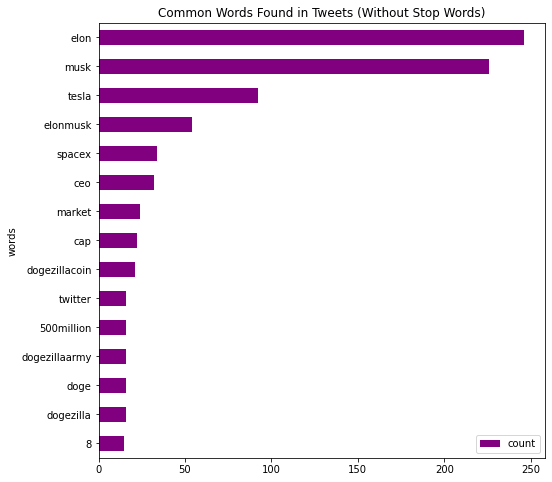

In [ ]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

![multiple_Apis](https://www.meme-arsenal.com/memes/d8d0c1244d221317e4396cd294823f73.jpg)


#### Github of Public APIS👇🏼


https://github.com/public-apis/public-apis
